# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Plotting-time-series-data" data-toc-modified-id="Plotting-time-series-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plotting time series data</a></div><div class="lev1 toc-item"><a href="#Faceting" data-toc-modified-id="Faceting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Faceting</a></div>

In [1]:
import pandas as pd

surveys_complete = pd.read_csv('../data/ecol_data_part1.csv')

In [21]:
surveys_complete.dtypes
surveys_complete['species_id'] = surveys_complete['species_id'].astype('str')

In [3]:
%matplotlib inline
from ggplot import *

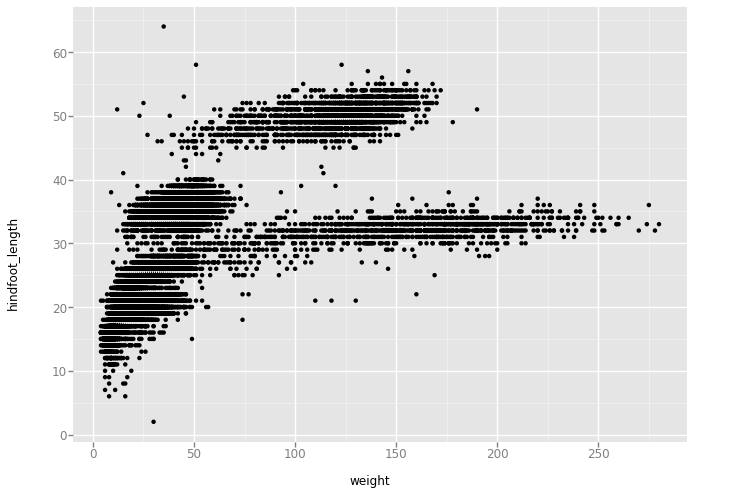

<ggplot: (-9223363265740482167)>

In [7]:
ggplot(aesthetics = aes(x='weight', y='hindfoot_length'), data=surveys_complete) \
    + geom_point()

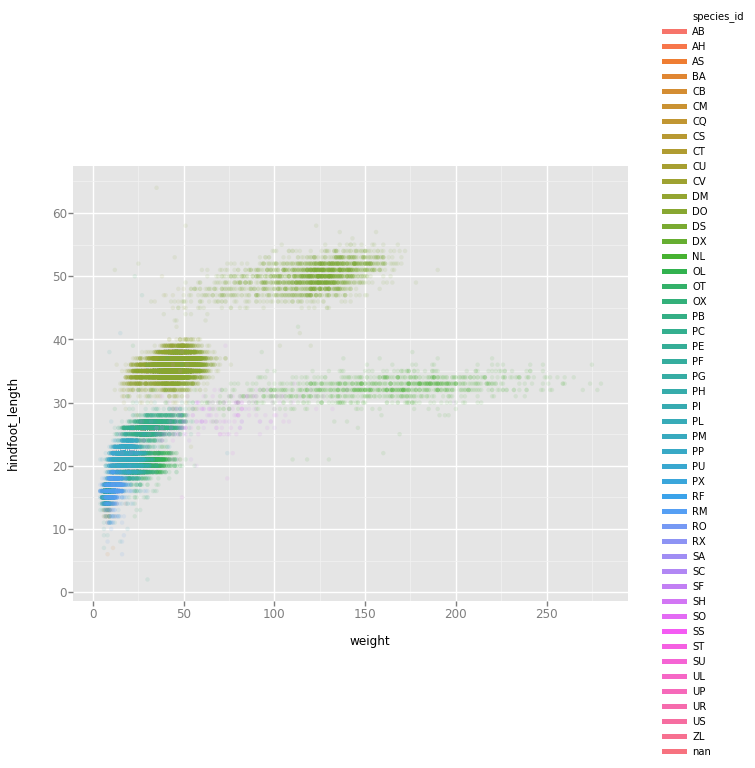

<ggplot: (-9223363265699411277)>

In [22]:
plt = ggplot(aes(x='weight', y='hindfoot_length', color='species_id'), data = surveys_complete) + geom_point(alpha=0.1)
plt

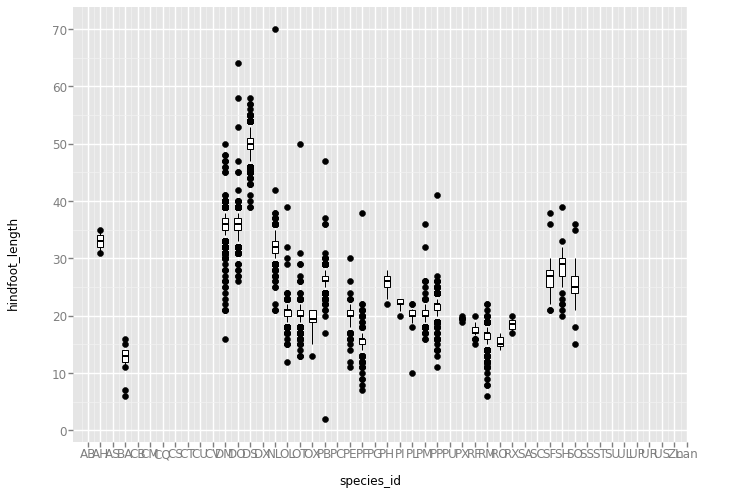

<ggplot: (-9223363265700573973)>

In [25]:
ggplot(aes(x='species_id', y='hindfoot_length'), data=surveys_complete) + geom_boxplot()

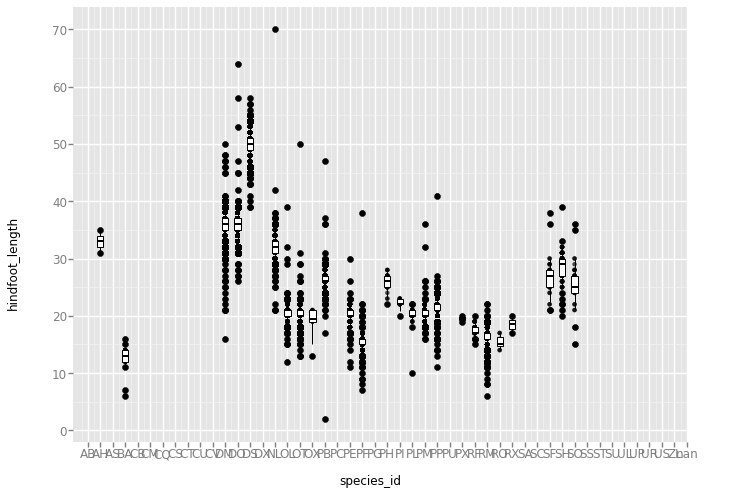

<ggplot: (-9223363265741217241)>

In [33]:
surveys_complete['species_factor'] = surveys_complete['species_id'].astype('category').cat.codes

xlabels = sorted(set(surveys_complete['species_id'].values))
xcodes = sorted(set(surveys_complete['species_factor'].values))

ggplot(aes(x='species_factor', y='hindfoot_length'), data=surveys_complete) + \
    geom_point(position='jitter', alpha=0.7, jittersize=0.4) + \
    scale_x_continuous(breaks=xcodes, labels=xlabels) + \
    xlab('species_id') + geom_boxplot(alpha=0)

# Plotting time series data

We:

* Retrieve indexing for year and species_id
* We group by year and ID, and calculating total number of IDs for each
* This is our data - we are ready to plot

In [37]:
yearly_counts = surveys_complete[['year', 'species_id']].groupby(['year', 'species_id']).size().reset_index()
yearly_counts.columns = ['year', 'species_id', 'n']
yearly_counts.head()

,year,species_id,n
0,1977,DM,264
1,1977,DO,12
2,1977,DS,98
3,1977,NL,31
4,1977,OL,10


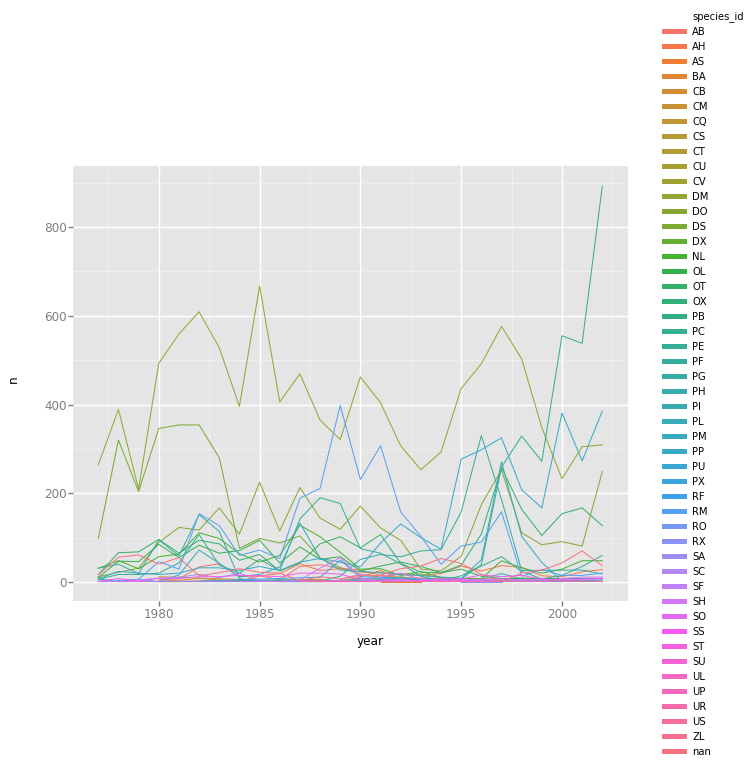

<ggplot: (-9223363265745983323)>

In [41]:
ggplot(aes(x='year', y='n', color='species_id'), data=yearly_counts) + geom_line()

# Faceting

In [45]:
yearly_sex_counts = surveys_complete.groupby(['year', 'species_id', 'sex']).count()
yearly_sex_counts['n'] = yearly_sex_counts['record_id']
yearly_sex_counts = yearly_sex_counts['n'].reset_index()
yearly_sex_counts.head()

,year,species_id,sex,n
0,1977,DM,F,104
1,1977,DM,M,152
2,1977,DO,F,10
3,1977,DO,M,2
4,1977,DS,F,58


Alright! So the facet wrapping here is performed based on species ID.

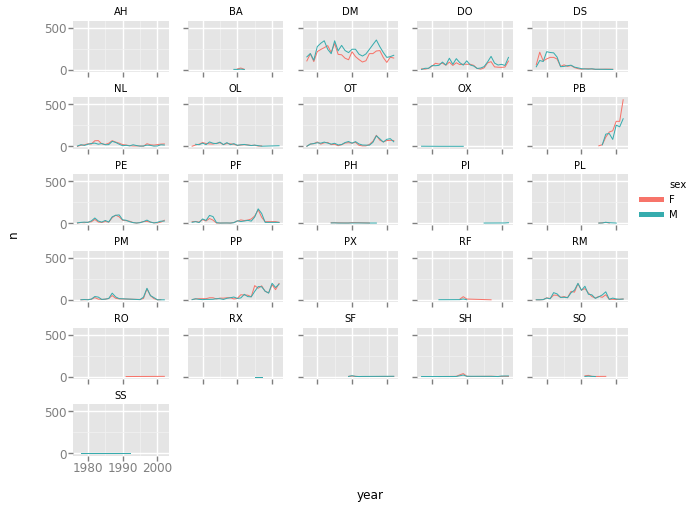

<ggplot: (-9223363265751982283)>

In [50]:
ggplot(aes(x="year", y="n", color="sex", group="sex"), data=yearly_sex_counts, )  + \
    geom_line() + \
    facet_wrap("species_id")